In [3]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
from math import sqrt
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np
from math import pi

def wrap(job,job_id,task_id):
    def singlerun(kf,phit,phi,L,run,duration):
        import numpy as np
        
        rm=0.005
        D=1
        R=2*rm
        rng = GSLRandomNumberGenerator()
        rng.seed(run)   
        f=1.0208582         
        rv=rm*f
        td =(2*rv)**2/(6*D)   
        kb=kf*4*math.pi*R*D*2
        kr=200
        kub=kr/2
        with species_attributes():
            C | {'D':str(0.0),'radius':str(rv)}
            E | {'D':str(D),'radius':str(rv)}
            S | {'D':str(D),'radius':str(rv)}
            P | {'D':str(D),'radius':str(rv)}
            ES | {'D':str(D),'radius':str(rv)}
        with reaction_rules():
            E+S ==ES | (kb,kub)
            ES > E+P | kr

        m=get_model()
        w = spatiocyte.SpatiocyteWorld(Real3(L,L,L),rv,rng)
        w.bind_to(m)
        size=tuple(w.calculate_shape(Real3(L,L,L),rv))    
        Nev = size[0]*size[1]*size[2]
        NS=int(Nev*phit)
        #NE=int(NS/10)
        NE=int(NS/50)
        Nc=int(Nev*phi)            
        w.add_molecules(Species('C'), Nc)
        w.add_molecules(Species('S'), NS)
        w.add_molecules(Species('E'), NE)
        sim = spatiocyte.SpatiocyteSimulator(w)
        sim.initialize()
        #duration = duration*td
        obs=FixedIntervalNumberObserver(td*10,['E','S','ES','P'])
        sim.run(duration,obs)        
        #tlogs,nalog=np.array(obs.data()).T
        if run==1:
            print('kf={},phit={},phi={},L={}'.format(kf,phit,phi,L))
            print('td={:.4e},kb={:.4e},kr={:.4e},kub={:.4e},Nc={},NE={},NS={},duration={:.4e}'.format(td,kb,kr,kub,Nc,NE,NS,duration))
        return obs.data()#tlogs,nalog
    job.update({'run':task_id})
    out=singlerun(**job)
    return out

def exe(jobs,simrun):    
    res=ensemble.run_multiprocessing(wrap,jobs,n=simrun,nproc=60,modules=('numpy','ecell4','math'))[0]
    #res=ensemble.run_slurm(wrap,jobs,n=simrun,nproc=500,path='tmp',modules=('numpy','ecell4','math'),extra_args=['--exclude=ibc[02,12,27]'])[0]
    res = np.array(res)
    meanres = np.mean(res,axis=0)   
    tt=meanres.T[0]
    Ne=meanres.T[1]
    Ns=meanres.T[2]
    Nes=meanres.T[3]
    Np=meanres.T[4]
    name='/home/chew/outputdata/3DMM_kf{:.3}phi{:.3}phit{:.3}L{}_NsisNe50'.format(jobs[0]["kf"],jobs[0]["phi"],jobs[0]["phit"],jobs[0]["L"])
    f=open(name,'w')
    np.savetxt(name,np.column_stack([tt,Ne,Ns,Nes,Np]),delimiter=',')
    f.close()    
    print(name)
    plt.plot(tt,Ne,label='E')
    plt.plot(tt,Ns,label='S')
    plt.plot(tt,Nes,label='ES')
    plt.plot(tt,Np,label='P')
    plt.legend()

kf=1.0,phit=0.01,phi=0.0,L=0.8
td=1.7369e-05,kb=2.5133e-01,kr=2.0000e+02,kub=1.0000e+02,Nc=0,NE=144,NS=7212,duration=1.0000e+00
/home/chew/outputdata/3DMM_kf1.0phi0.0phit0.01L0.8_NsisNe50


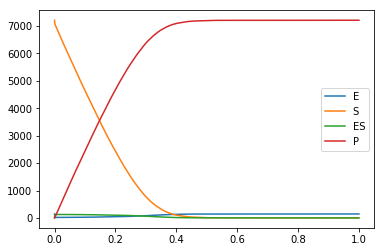

In [4]:
kf=1.
phit=0.01
phi=0.0
L=0.8
dur=0.4
simrun=30
phis=[0.0]#,0.3,0.5,0.7]
for phi in phis:
    jobs = [{'kf':kf,'phit':phit,'phi':phi,'L':L,'duration':dur}]
    exe(jobs,simrun)


kf=0.01,phit=0.01,phi=0.0,L=0.8
td=1.7369e-05,kb=2.5133e-03,kr=2.0000e+02,kub=1.0000e+02,Nc=0,NE=144,NS=7212,duration=2.0000e+00
/home/chew/outputdata/3DMM_kf0.01phi0.0phit0.01L0.8_NsisNe50


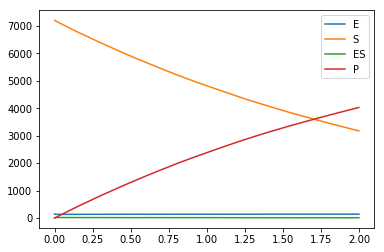

In [6]:
kf=0.01
phit=0.01
phi=0.0
L=0.8
dur=4
simrun=30
phis=[0.0]#,0.1,0.3,0.5,0.7]
for phi in phis:
    jobs = [{'kf':kf,'phit':phit,'phi':phi,'L':L,'duration':dur}]
    exe(jobs,simrun)


kf=0.01,phit=0.01,phi=0,L=0.8
td=1.7369e-05,kb=2.5133e-03,kr=2.0000e+02,Nc=0,NE=721,NS=7212,duration=1.0000e+00
6340.2


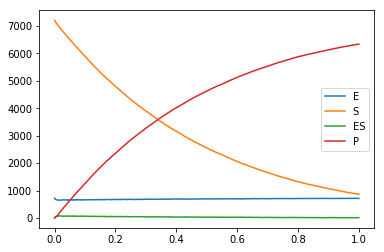

In [9]:
kf=0.01
phit=0.01
phi=0
L=0.8
dur=1
simrun=5
jobs = [{'kf':kf,'phit':phit,'phi':phi,'L':L,'duration':dur}]
exe(jobs,simrun)
